In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/')
import numpy as np
from dataset.video import Video
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
videopath = "../data/database_convertida/DEPR_F3_ID19.avi"
video = Video(videopath, annotationpath=videopath.replace('.avi', '.json'))

frames_idxs = [0, 12, 25]

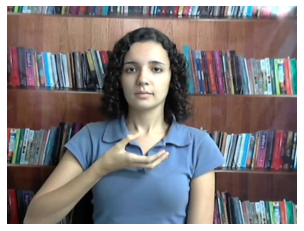

In [4]:
frame_idx = 0
video_name = video.video_name.split('.')[0]

frame = video.get_frame(frame_idx)
plt.imshow(frame[:,:,::-1])
plt.axis('off')

os.makedirs("figs/", exist_ok=True)
plt.savefig(f"figs/{video_name}_f{frame_idx:04d}.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

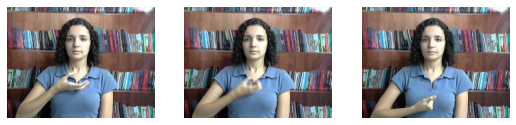

In [5]:
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
frame = video.get_frame(frames_idxs[0])
plt.imshow(frame[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,2)
frame = video.get_frame(frames_idxs[1])
plt.imshow(frame[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,3)
frame = video.get_frame(frames_idxs[2])
plt.imshow(frame[:,:,::-1])
plt.axis('off')

plt.savefig("figs/frames.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

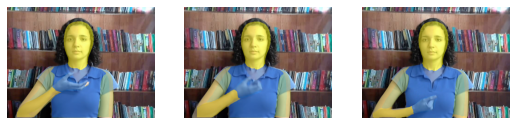

In [6]:
# the mask is inside the bouding box
# to recover the mask with original image size do the following
from utils.image import recover_original_mask_size, overlay_segmentation


w,h = video.get_width_height()

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)

frame = video.get_frame(frames_idxs[0])
frame_annot = video.segmentation.get_frame_annotation(frames_idxs[0])

mask = overlay_segmentation(frame, frame_annot, alpha=0.5)
mask = mask[:,:, ::-1]

# mask = recover_original_mask_size(frame_annot, (w,h) )

plt.imshow(mask)
plt.axis('off')

plt.subplot(1,3,2)
frame = video.get_frame(frames_idxs[1])
frame_annot = video.segmentation.get_frame_annotation(frames_idxs[1])

mask = overlay_segmentation(frame, frame_annot, alpha=0.5)
mask = mask[:,:, ::-1]

# mask = recover_original_mask_size(frame_annot, (w,h) )
plt.imshow(mask)
plt.axis('off')

plt.subplot(1,3,3)
frame = video.get_frame(frames_idxs[2])
frame_annot = video.segmentation.get_frame_annotation(frames_idxs[2])

mask = overlay_segmentation(frame, frame_annot, alpha=0.5)
mask = mask[:,:, ::-1]

# mask = recover_original_mask_size(frame_annot, (w,h) )
plt.imshow(mask)
plt.axis('off')

plt.savefig("figs/segmentation.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

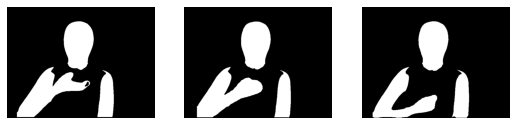

In [7]:
# now, lets make a binay mask conaining only the parts of the body we want
from utils.image import select_body_parts
body_parts_use = ['RightHand',
                   'LeftHand',
                   'UpperArmLeft',
                   'UpperArmRight',
                   'LowerArmLeft',
                   'LowerArmRight',
                   'Head']

# in this example, we are selecting all parts but torso
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
frame_annot = video.segmentation.get_frame_annotation(frames_idxs[0])
mask = recover_original_mask_size(frame_annot, (w,h) )
mask_body_parts = select_body_parts(mask, body_parts_use)
plt.imshow(mask_body_parts, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
frame_annot = video.segmentation.get_frame_annotation(frames_idxs[1])
mask = recover_original_mask_size(frame_annot, (w,h) )
mask_body_parts = select_body_parts(mask, body_parts_use)
plt.imshow(mask_body_parts, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
frame_annot = video.segmentation.get_frame_annotation(frames_idxs[2])
mask = recover_original_mask_size(frame_annot, (w,h) )
mask_body_parts = select_body_parts(mask, body_parts_use)
plt.imshow(mask_body_parts, cmap='gray')
plt.axis('off')

plt.savefig("figs/masks.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

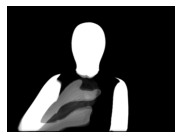

In [8]:
# Lets generate the GEI for this video
all_videos_mask = []

video_annot = video.segmentation.get_video_annotation()
w,h = video.get_width_height()

for frame, annotations in video_annot.items():
    mask = recover_original_mask_size(annotations, (w,h))
    mask_body_parts = select_body_parts(mask, ['RightHand',
                                           'LeftHand',
                                           'UpperArmLeft',
                                           'UpperArmRight',
                                           'LowerArmLeft',
                                           'LowerArmRight',
                                           'Head'])
    all_videos_mask.append(mask_body_parts)
    
    
gei = np.mean(all_videos_mask, axis=0)

plt.figure(figsize=(3,3))
plt.imshow(gei, cmap='gray')
plt.axis('off')

plt.savefig("figs/gei.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

In [9]:
from src.utils.image import crop_person_img

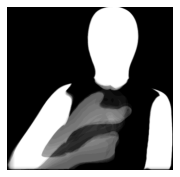

In [10]:
gei_croped = crop_person_img(gei)
plt.figure(figsize=(3,3))
plt.imshow(gei_croped, cmap='gray')
plt.axis('off')

plt.savefig("figs/gei_cropped.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

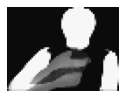

In [15]:
gei_croped_rescaled = cv2.resize(gei_croped, (64,48), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(2,3))
plt.imshow(gei_croped_rescaled, cmap='gray')
plt.axis('off')

plt.savefig("figs/gei_cropped_rescaled.png", bbox_inches='tight', pad_inches=0.0,)
plt.show()

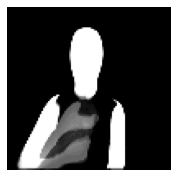

In [12]:
# we can use the function that encapsultes it
from utils.image import generate_gei

body_parts = ['RightHand',
              'LeftHand',
              'UpperArmLeft',
              'UpperArmRight',
              'LowerArmLeft',
              'LowerArmRight',
              'Head']
gei = generate_gei(video, output_dim=(100,100), normalized=True, body_parts=body_parts)

plt.figure(figsize=(3,3))
plt.imshow(gei, cmap= 'gray')
plt.axis('off')
plt.show()